A solution to https://fivethirtyeight.com/features/can-you-rule-riddler-nation/

I took a computational approach. First, generate a population of random strategies, then pit them against each other. Save the top 50% of the strategies by win % and propagate them to the next round. Repeat for 10,000 rounds.

An interesting property of this game is that strategies are non-transitive in head-to-head matches. Additionally, the best strategy depends on the distribution of the strategies in the competition pool. The computational approach that I took assumes a competition pool of 1/2 "good-ish" strategies and 1/2 random strategies. Here's hopin'!

In [599]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [600]:
casstle_points = np.linspace(1,10,10)

def calc_outcome(p1,p2):
    '''Play troop distribution p1 against p2
    return True if p1 beats p2. A tie or p2 wins returns False'''
    p1_victory = p1 > p2
    ties = p1 == p2
    p1_points = casstle_points[p1_victory].sum() + casstle_points[ties].sum()/2.0
    return (p1_points > 27.5)*1.0

In [601]:
p1 = np.array([0,0,0,0,0,2,2,2,2,2])
p2 = np.array([1,1,1,1,1,1,1,1,1,1])

calc_outcome(p1,p2)

1.0

In [602]:
idx = range(10)
def random_troops():
    '''Generate a random troop distribution'''
    troop_list = np.zeros(10)
    n_left = 10
    np.random.shuffle(idx)
    for i in range(9):
        troops_here = np.random.randint(n_left+1)
        n_left -= troops_here
        troop_list[idx[i]] = troops_here
    troop_list[idx[9]] = n_left
    return troop_list
random_troops()

array([ 1.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [603]:
def battle(troop_pop):
    '''Compute the game matrix for a population of troop distributions'''
    pop_size = troop_pop.shape[0]
    win_mat = np.zeros((pop_size,pop_size))
    for i in range(pop_size):
        for j in range(pop_size):
            win_mat[i,j] = calc_outcome(troop_pop[i,:],troop_pop[j,:])
    return win_mat

def get_ranking(win_mat):
    scores = win_mat.sum(1)
    ranking = np.argsort(scores)
    return ranking[::-1], scores

In [606]:
%timeit troop_pop = random_troops()

The slowest run took 34.70 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.27 µs per loop


In [607]:
%timeit calc_outcome(troop_pop[0,:],troop_pop[1,:])

The slowest run took 7.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.4 µs per loop


0 373.0 191.455
[[ 1.  2.  0.  0.  0.  0.  1.  2.  3.  1.]
 [ 0.  0.  0.  0.  1.  1.  0.  0.  5.  3.]
 [ 0.  1.  0.  2.  0.  4.  1.  1.  0.  1.]
 [ 0.  0.  1.  0.  0.  1.  3.  0.  4.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  2.  5.  2.]]
[ 373.  373.  372.  372.  371.]


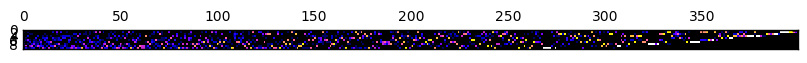

500 306.0 194.19
[[ 0.  0.  0.  0.  1.  1.  3.  1.  2.  2.]
 [ 0.  0.  0.  1.  1.  1.  2.  1.  4.  0.]
 [ 0.  0.  0.  1.  1.  0.  1.  3.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  2.  3.  1.]
 [ 0.  0.  0.  1.  1.  1.  3.  1.  3.  0.]]
[ 306.  305.  304.  304.  303.]


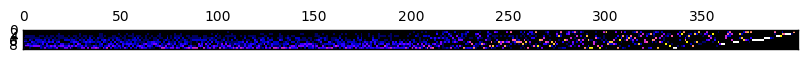

1000 304.0 194.4975
[[ 0.  0.  0.  1.  1.  1.  2.  1.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  2.  2.  2.]
 [ 0.  0.  0.  0.  1.  0.  3.  3.  1.  2.]
 [ 0.  0.  0.  1.  1.  2.  0.  2.  1.  3.]
 [ 0.  0.  0.  0.  1.  1.  0.  2.  4.  2.]]
[ 304.  303.  301.  301.  300.]


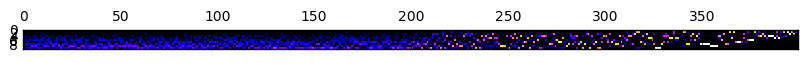

1500 303.0 194.29
[[ 0.  0.  0.  1.  1.  2.  1.  3.  0.  2.]
 [ 0.  0.  0.  1.  1.  2.  2.  0.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  3.  0.  3.  0.]
 [ 0.  0.  0.  1.  1.  2.  2.  0.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  2.  3.  1.]]
[ 303.  301.  301.  301.  300.]


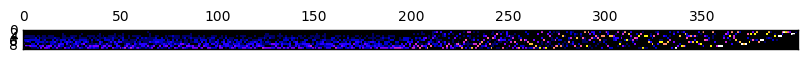

2000 301.0 194.5475
[[ 0.  0.  0.  0.  1.  2.  1.  1.  1.  4.]
 [ 0.  0.  0.  1.  1.  0.  2.  0.  2.  4.]
 [ 0.  0.  0.  1.  0.  2.  2.  1.  2.  2.]
 [ 0.  0.  0.  0.  1.  1.  2.  1.  1.  4.]
 [ 0.  0.  0.  1.  1.  1.  0.  1.  2.  4.]]
[ 301.  299.  298.  298.  298.]


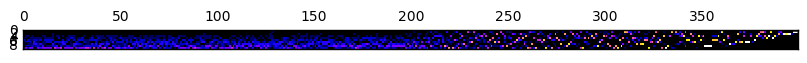

2500 301.0 194.6175
[[ 0.  0.  0.  1.  1.  1.  2.  0.  4.  1.]
 [ 0.  0.  0.  1.  0.  1.  1.  1.  4.  2.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  3.  0.]
 [ 0.  0.  0.  1.  1.  2.  2.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  2.  2.  3.  2.  1.]]
[ 301.  299.  299.  298.  298.]


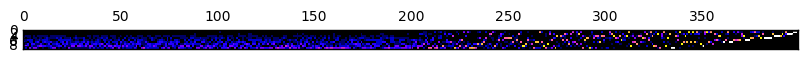

3000 303.0 194.615
[[ 0.  0.  0.  0.  2.  1.  3.  2.  2.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  3.  1.  4.]
 [ 0.  0.  0.  1.  2.  0.  2.  3.  2.  0.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  3.  0.]
 [ 0.  0.  0.  0.  2.  2.  2.  2.  1.  1.]]
[ 303.  302.  302.  300.  299.]


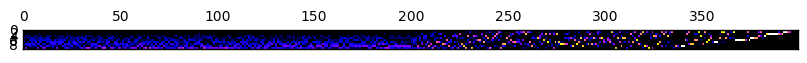

3500 301.0 194.2625
[[ 0.  0.  0.  0.  1.  1.  2.  1.  1.  4.]
 [ 0.  0.  0.  1.  2.  0.  0.  4.  1.  2.]
 [ 0.  0.  0.  1.  1.  2.  2.  1.  0.  3.]
 [ 0.  0.  0.  1.  2.  1.  0.  1.  3.  2.]
 [ 0.  0.  0.  0.  1.  0.  3.  3.  1.  2.]]
[ 301.  300.  299.  298.  298.]


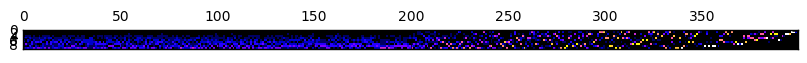

4000 298.0 194.4425
[[ 0.  0.  0.  1.  1.  1.  0.  3.  3.  1.]
 [ 0.  0.  0.  1.  1.  1.  2.  1.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  3.  1.  2.  0.]
 [ 0.  0.  0.  1.  1.  1.  3.  1.  3.  0.]
 [ 0.  0.  0.  0.  0.  1.  2.  1.  2.  4.]]
[ 298.  297.  297.  296.  295.]


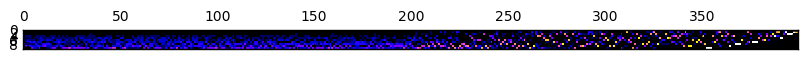

4500 305.0 194.315
[[ 0.  0.  0.  1.  2.  2.  0.  1.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  3.  2.  1.  0.]
 [ 0.  0.  0.  0.  1.  2.  3.  2.  0.  2.]
 [ 0.  0.  0.  1.  2.  0.  2.  1.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  2.  1.  0.  3.]]
[ 305.  304.  302.  301.  299.]


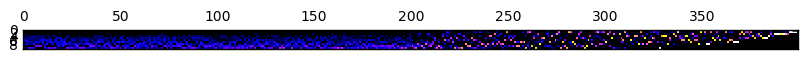

5000 298.0 194.4925
[[ 0.  0.  0.  0.  1.  2.  0.  2.  1.  4.]
 [ 0.  0.  1.  0.  2.  2.  1.  3.  1.  0.]
 [ 0.  0.  0.  1.  1.  1.  2.  1.  3.  1.]
 [ 0.  0.  0.  1.  2.  0.  2.  1.  0.  4.]
 [ 0.  0.  0.  1.  0.  2.  0.  2.  1.  4.]]
[ 298.  298.  298.  297.  297.]


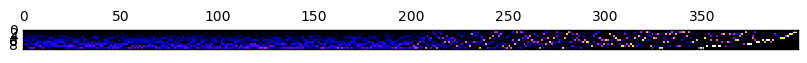

5500 298.0 194.6825
[[ 0.  0.  0.  1.  1.  0.  2.  2.  3.  1.]
 [ 0.  0.  0.  1.  0.  2.  1.  3.  1.  2.]
 [ 0.  0.  0.  0.  1.  1.  3.  3.  2.  0.]
 [ 0.  0.  0.  1.  2.  0.  2.  3.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  2.  3.  3.  1.]]
[ 298.  296.  295.  295.  295.]


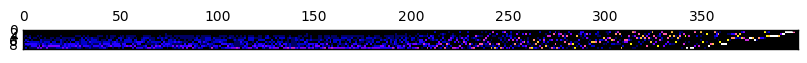

6000 299.0 194.55
[[ 0.  0.  0.  1.  1.  2.  2.  0.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  2.  0.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  2.  0.  4.  0.]
 [ 0.  0.  0.  1.  1.  2.  1.  1.  4.  0.]
 [ 0.  0.  0.  1.  0.  2.  1.  3.  3.  0.]]
[ 299.  299.  299.  298.  297.]


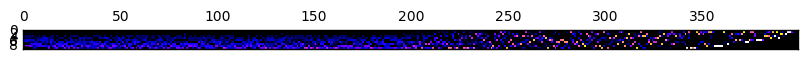

6500 300.0 194.3325
[[ 0.  0.  0.  0.  1.  1.  0.  0.  4.  4.]
 [ 0.  0.  0.  1.  1.  1.  2.  1.  3.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  3.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  0.  3.]
 [ 0.  0.  0.  0.  0.  1.  2.  3.  3.  1.]]
[ 300.  299.  298.  297.  297.]


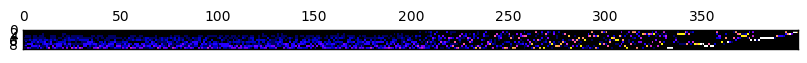

7000 304.0 194.84
[[ 0.  0.  0.  1.  1.  1.  0.  3.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  0.  2.  0.  4.]
 [ 0.  0.  0.  1.  1.  0.  0.  3.  3.  2.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  2.  4.]
 [ 0.  0.  0.  1.  1.  1.  0.  2.  4.  1.]]
[ 304.  302.  300.  300.  300.]


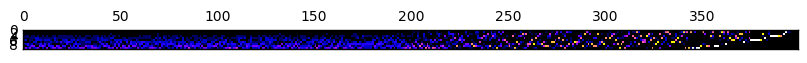

7500 308.0 194.485
[[ 0.  0.  0.  1.  1.  2.  0.  2.  0.  4.]
 [ 0.  0.  0.  0.  1.  2.  2.  1.  0.  4.]
 [ 0.  0.  0.  1.  2.  2.  0.  1.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  3.  3.  0.  0.]
 [ 0.  0.  0.  1.  1.  2.  3.  2.  1.  0.]]
[ 308.  301.  300.  298.  298.]


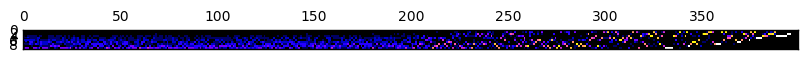

8000 303.0 194.655
[[ 0.  0.  0.  1.  1.  1.  0.  3.  0.  4.]
 [ 0.  0.  0.  1.  2.  2.  0.  1.  0.  4.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  3.  0.]
 [ 0.  0.  0.  1.  2.  2.  1.  3.  1.  0.]
 [ 0.  0.  0.  1.  1.  2.  3.  3.  0.  0.]]
[ 303.  302.  301.  300.  299.]


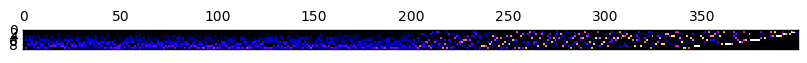

8500 304.0 194.42
[[ 0.  0.  0.  1.  0.  0.  0.  3.  2.  4.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  2.  1.]
 [ 0.  0.  0.  1.  2.  0.  0.  3.  2.  2.]
 [ 0.  0.  0.  1.  2.  2.  2.  1.  2.  0.]
 [ 0.  0.  0.  1.  2.  2.  0.  1.  0.  4.]]
[ 304.  302.  300.  299.  299.]


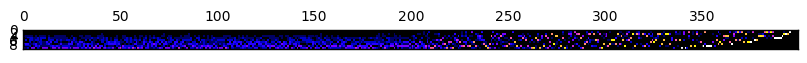

9000 304.0 194.8525
[[ 0.  0.  0.  1.  1.  1.  2.  1.  3.  1.]
 [ 0.  0.  0.  1.  1.  1.  2.  1.  0.  4.]
 [ 0.  0.  0.  1.  2.  2.  2.  1.  2.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  2.  5.]
 [ 0.  0.  0.  1.  1.  2.  0.  3.  3.  0.]]
[ 304.  302.  299.  299.  298.]


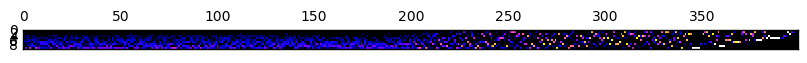

9500 303.0 194.525
[[ 0.  0.  0.  1.  1.  2.  3.  3.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  2.  2.  4.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  1.  4.  2.]
 [ 0.  0.  0.  1.  1.  0.  2.  0.  4.  2.]
 [ 0.  0.  0.  1.  1.  0.  2.  0.  4.  2.]]
[ 303.  300.  300.  297.  297.]


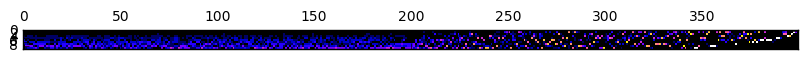

In [611]:
pop_size = 400
n_top = 200

# Generate a random population of troop distributions
troop_pop = np.array([random_troops() for i in range(pop_size)])
for generation in range(10000):
    win_mat = battle(troop_pop)
    ranking, scores = get_ranking(win_mat)
    # Top of the Pops! Save the top n troop distributions
    top_of_the_pop = troop_pop[ranking[:n_top],:]
    if (generation % 500) == 0:
        print generation, scores.max(), scores.mean()
        print troop_pop[ranking[:5],:]
        print scores[ranking[:5]]
        fig, ax = plt.subplots(1,1,figsize=(10,2))
        ax.matshow(troop_pop[ranking,:].T,cmap='gnuplot2')
        plt.show()
    troop_pop = np.array([random_troops() for i in range(pop_size)])
    # Propogate the top of the pops to the
    # next generation.
    troop_pop[:n_top,:] = top_of_the_pop

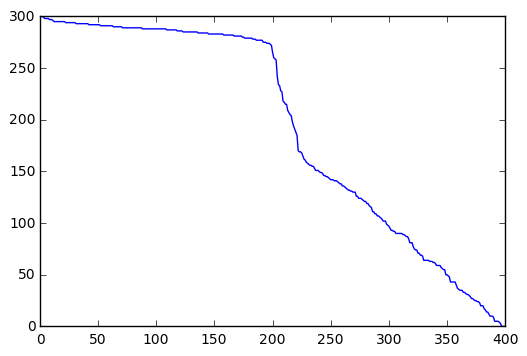

In [612]:
plt.plot(range(pop_size),scores[ranking])
plt.show()

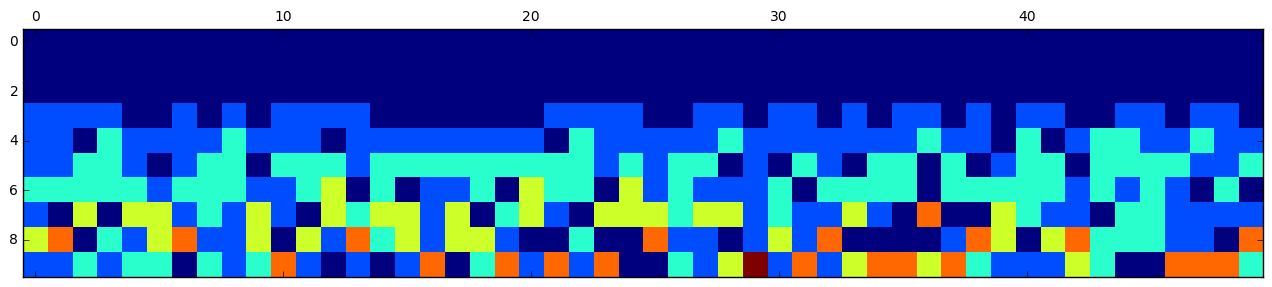

In [614]:
plt.matshow(troop_pop[ranking[:50]].T)